# Zindi Crop Disease

In [6]:
#hide
#!pip install -Uqq fastbook
!pip3 install git+https://github.com/fastai/fastai.git
import fastbook
fastbook.setup_book()

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-y1y0x2hj
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-y1y0x2hj
  Created wheel for fastai: filename=fastai-2.2.8-cp37-none-any.whl size=192562 sha256=aabdd28833786437b10bb523b3291c1dbd02ccb9c096764225e45bb8b32b59e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-fu_pvs_a/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 2.2.7
    Uninstalling fastai-2.2.7:
      Successfully uninstalled fastai-2.2.7


In [7]:
#hide
from fastbook import *
from fastai.vision.all import *

In [9]:
import zipfile
with zipfile.ZipFile('gdrive/MyDrive/AI Machine Learning/images/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('gdrive/MyDrive/AI Machine Learning/images/CropDisease/')

In [56]:
path = Path("/content/gdrive/MyDrive/AI Machine Learning/images/CropDisease/train/train")

In [60]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [61]:
dls = dblock.dataloaders(path)

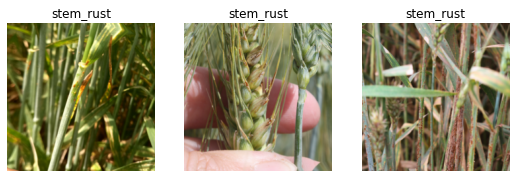

In [62]:
dls.show_batch(nrows=1, ncols=3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.198507,5.510440,0.428571,01:27


epoch,train_loss,valid_loss,error_rate,time
0,2.754434,25.577572,0.830357,01:27


Minimum/10: 4.37e-04, steepest point: 9.12e-07


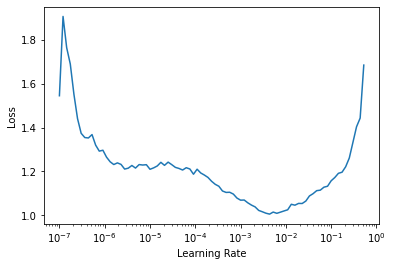

In [49]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [65]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(15, base_lr=4.37e-04)

epoch,train_loss,valid_loss,error_rate,time
0,1.721271,1.082480,0.500000,01:28


epoch,train_loss,valid_loss,error_rate,time
0,1.281175,1.084393,0.473214,01:28
1,1.226573,1.120794,0.500000,01:28
2,1.146420,1.178222,0.482143,01:28
3,1.045006,1.235104,0.473214,01:28
4,0.972632,1.112809,0.455357,01:28
5,0.881920,1.169334,0.526786,01:28
6,0.802392,1.142854,0.517857,01:28
7,0.743451,1.073707,0.473214,01:28
8,0.680210,1.069942,0.473214,01:28
9,0.632590,1.017686,0.464286,01:28


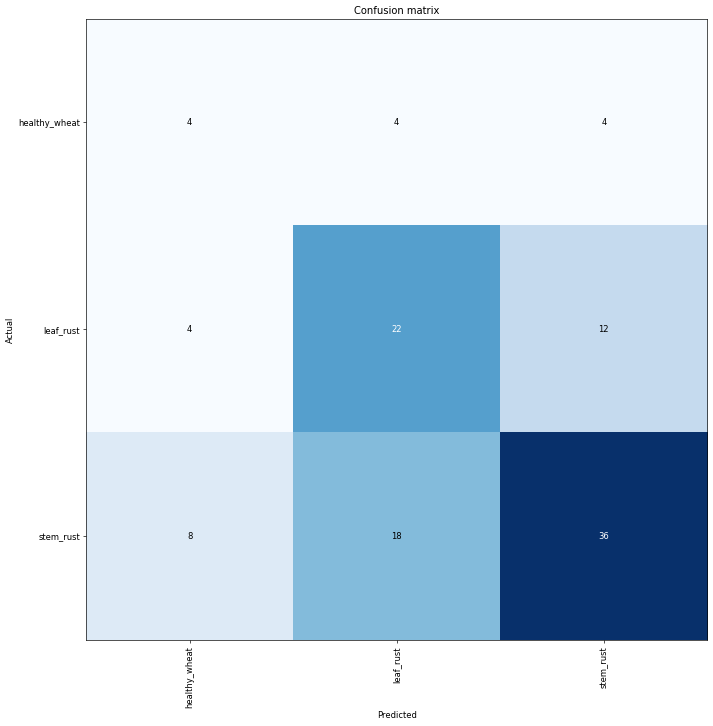

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [67]:
learn.export()

In [68]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['healthy_wheat', 'leaf_rust', 'stem_rust']

In [69]:
img = PILImage.create('/content/gdrive/MyDrive/AI Machine Learning/images/CropDisease/test/test/008FWT.JPG')

In [70]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [71]:
learn_inf.predict(img)

('stem_rust', tensor(2), tensor([0.1046, 0.0735, 0.8219]))